![](https://raw.githubusercontent.com/wilocw/co2114-codebase/2024/static/0/uol_banner_red.png)

# CO2114<br />Foundations in Artificial Intelligence

# Tutorial 1 - Maths Primer 1

This tutorial will review the basic mathematical foundations that will be required throughout the remainder of the course. The aim of this tutorial is to act as a reference document for maths concepts used in future lectures, tutorials and labs, and ensure that you have a basic understanding of the techniques that will be used.

This tutorial will recap:
- Functions
- Propositions and representations of logic
- Sets, graphs and trees

All of these concepts will be grounded in practical Python code so you can see how these concepts directly translate to programming. You may find some parts of this tutorial intuitive, and you may find some parts of it difficult. These maths fundamentals are important to give you a solid foundation in artificial intelligence.

## 1 Functions

The simple functional form $y = f(X)$ is used across many disciplines and subjects. The function $f$ simply defines the behaviour of a process of transforming input $X$ into output $y$.

In Python, the equivalent is a `def`ined function, `f` that takes input `X` and returns `y`.

```python
def f(x):
    # definition
    return y
```

The definition of the function describes _how_ $X$ is transformed. For example, suppose we have a function defined $f: x\mapsto x+1$. This is simply equivlant to $y = x+1$ or in Python:
```python
def f(x):
    y = x + 1
    return y
```

> Note that when _saying_ $f(X)$ out loud, you would say "f of X"

#### Exercise 1a
Turn these function definitions into Python functions, where $y = f(X)$

(a) $f : x \mapsto -x$

In [1]:
def f(x):
    y = -x
    return y

X = 10
print(f(X))  #= -10

-10


(b) $f: x \mapsto x^2$

In [2]:
def f(x):
    y = x**2
    return y

X = 2
print(f(X))  #= 4

4


(c) $f: x \mapsto 3x + 2$

In [3]:
def f(x):
    y = 3*x + 2
    return y

X = -1
print(f(X))  #= -1

-1


### Lambda Functions

Sometimes, when programming, it may be beneficial to define a function inline for a more light weight approach. In Python, we can utilise anonymous `lambda` functions, which don't have identifers and can simply be assigned to a variable. 

Consider the following lambda definition for $x\mapsto x+1$:

$$\underbrace{\mathrm{\texttt{lambda x:}}}_{x\mapsto}\ \underbrace{\mathrm{\texttt{x+1}}}_{x+1}$$

Here, instead of creating a new `def` somewhere else in your code, you can write a simple line in your code, e.g.

```python
f = lambda x: x + 1
y = f(X)
```

Note that the variable `x` within the lambda function is a local variable, and different to the `X` used as input to `f`. This is the same as typical function definitions.

#### Exercise 1b
Reimplement the functions from Exercise 1a as anonymous `lambda` functions.

In [4]:
# f = lambda x: ...
#(a)
f = lambda x: -x
#(b)
f = lambda x: x**2
#(c)
f = lambda x: 3*x + 2

### Composite Functions

Composite functions describe functions that take the output of another function as their input. In reality, you might see this where you need to further process an input.

For example, consider two functions $f$ and $g$. Suppose we have $y = g(f(X))$ which is, essentially, the mapping of $X$ by $f$ and then by $g$. You might write this as:

$$Z = f(X)$$
$$y = g(Z)$$

Alternatively, you might write $y = (g\circ f)(X)$ ("g of f of X"). Sometimes you could chain multiple functions in long sequences, and it can be efficient to break them into small sub-functions, such as $f$ and $g$.


Looking at the following example, we have $f:x\mapsto 1-x$ and $g:x\mapsto x^2$.

In [5]:
def f(x):
    y = 1-x
    return y

def g(x):
    y = x**2
    return y

In [6]:
## or alternatively
f = lambda x: 1-x
g = lambda x: x**2

We can define $g\circ f$ and $f\circ g$ easily by just creating a _new_ function that simply combines the two in their respective execution orders:

In [7]:
def g_of_f(x):
    z = f(x)
    y = g(z)
    return y

def f_of_g(x):
    z = g(x)
    y = f(z)
    return y

In [8]:
## or alternatively
g_of_f = lambda x: g(f(x))
f_of_g = lambda x: f(g(x))

We can look at the outputs of these functions using `pyplot`.

> Note that I am defining a utility function here called `apply()` that evaluates a function on every element of a list.

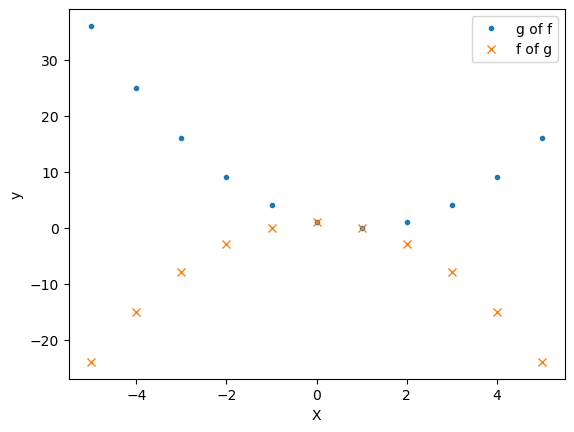

In [9]:
from matplotlib import pyplot as plt

def apply(f, X):
    return [f(x) for x in X]

# create a list of inputs from -5 to 5
X = [-5,-4,-3,-2,-1,0,1,2,3,4,5];

# plot g(f(X))
plt.plot(X, apply(g_of_f, X), '.', label="g of f")
# plot(f(g(X))
plt.plot(X, apply(f_of_g, X), 'x', label="f of g")

# annotate the plot
plt.xlabel('X'), plt.ylabel('y'),plt.legend();

#### Exercise 1c
Consider the function definitions: $f:x\mapsto 1-x$ and $g:x\mapsto x^2$.

Can you work out the equivalent function that defines:

(a) $f\circ g$?

(b) $g\circ f$?

(c) $g\circ f\circ g\circ f$?

**Answers**

(a) $f\circ g: x \mapsto 1 - x^2$

(b) $g\circ f: x \mapsto x^2 - 2x + 1$

(c) $g\circ f\circ g\circ f: x \mapsto 4x^2 - 4x^3 + x^4$

As we have seen, the ordering of functions can have drastic effects on the output. It is possible to create complex, expressive functions using by chaining small ones. These can be used to create models that represent greater complexity than the sum of their parts without having to explicitly implement every step.

> This will be important later in the module when we look at _learning_. Anyone interested in neural networks, in particular, should have a strong grasp on function composition.

### Multiple Inputs and Parameters

Sometimes we will implement functions with multiple inputs. These might be where we have two input variables, e.g. $X_0$ and $X_1$, or where we have some additional parameters we want to include to make our function more configurable.

Consider the following two cases:

$y = X_0 + X_1$

$y = aX + b$

We can define these respective functions as $f_1: x_1,x_2 \mapsto x_1+x_2$ and $f_2:x;a,b \mapsto ax+b$. Both of these functions take multiple inputs, but the way we (typically) interpret them is that $f_1$ takes as input a single input $X$ with two dimensions, e.g. a list with length 2.

```python
def f1(x):
    y = x[0] + x[1]
    return y
```

This is similar to other functions we've seen, where we treat $X$ as a single variable.

For $f_2$, we have a single $x$ and two additional inputs $a$ and $b$. In our function, these interact with $x$ to change the output. If $a=3$ and $b=2$, $f_2 : x\mapsto 3x+2$. However it is often the case that we want to be able to adjust these parameters to tweak our model. This is why we have given them the names $a$ and $b$.

A Python implementation of such a function might look like this:
```python
def f2(x, a, b):
    y = a*x+b
    return y
```

Now we have three variables, we can tweak these as we need. This gives us flexibility to define our model.

You might have noticed, if you remember from high school maths, that this is the function that describes a straight line. We can see the effects of changing $a$ and $b$ using the following code:

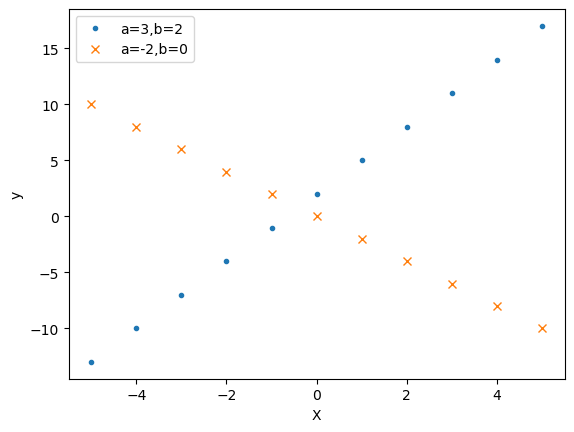

In [10]:
def f2(x, a, b):
    y = a*x+b
    return y

X = [-5,-4,-3,-2,-1,0,1,2,3,4,5];

# plot f(x, a=3, b=2)
f = lambda x: f2(x, a=3, b=2)
plt.plot(X, apply(f, X), '.', label="a=3,b=2")

# plot f(x, a=-2, b=0)
f = lambda x: f2(x, a=-2, b=0)
plt.plot(X, apply(f, X), 'x', label="a=-2,b=0")

# annotate the plot
plt.xlabel('X'), plt.ylabel('y'), plt.legend();

## 2 Representations of Logic

Logic is a core concept in in most areas of computing. The same is true for artificial intelligence.

Propositional logic deals with "propositions", sentences that are either true or false. Propositions form the knowledge by which a system can make decisions. Propositional logic is the set of formal rules for combining these to derive new propositions.

Without a grasp of proposition, designing artificial intelligence that can reason is going to be a challenge.

### Propositions

Consider the following statement:
> "It is raining."

This statement is either true or false. It can either be raining or not be raining. This is a proposition, that describes the state of a given system. We can represent this with some symbol $P$. 

In [11]:
P = True  # It is raining.

P

True

### Logical connectives

#### Negation

Consider though that it is **not** raining. How do we represent that?

We can define the connective "not" that _negates_ a given proposition. This is typically denoted with a $\lnot$, e.g. $\lnot P$.

In Python, we can use the `not` keyword:

In [12]:
not P  # It is not raining

False

We can represent the behaviour of "not" with a truth table.

> _Truth tables are methods for showing truth values of compound propositions using the truth falue of its components. It is typically created with rows representing possible truth values and columns representing the proposition_

| $P$   | $\lnot P$  |
|-------|------------|
| True  | False      |
| False | True       |

We can generate this truth table in Python by looping through options for $P$:

In [13]:
for p in [True, False]:
    print(p, not p)

True False
False True


#### Conjunction ("and", $\land$)

The conjunction of two propositions, $P, Q$, is the logical sentence representing "$P$ and $Q$". 

Conjunction is represented notationally as $\land$. The conjunction is true only if both propositions are true, i.e. $P\land Q$ is true only if $P$ is true and $Q$ is true. It is false otherwise.

We can write a truth table for this:

| $P$   | $Q$   | $P \land Q$ |
|-------|-------|-------------|
| True  | True  | True        |
| True  | False | False       |
| False | True  | False       |
| False | False | False       |

Or in Python, loop through all possible combinations of $P$ and $Q$ to print it.

Representing conjunction in Python is simply the `and` keyword:

In [14]:
for p in [True, False]:
    for q in [True, False]:
        print(p, q, p and q)

True True True
True False False
False True False
False False False


> _We use the `and` keyword for logical operations, however you can also use `&`, similar to other languages. `&` represents bitwise AND, which operates directly on the bits. Since `True` is bit 1 and `False` is bit 0, `and` and `&` are equivalent operations. We will use `and`, and other keywords, for readability_

#### Disjunction ("or", $\lor$)

Disjunction describes the logical operation representing "or". It is represented with $\lor$. For propositions $P,Q$, the proposition $P\lor Q$ is true if either $P$ or $Q$ are true.

The truth table for disjunction is

| $P$   | $Q$   | $P \lor Q$ |
|-------|-------|-------------|
| True  | True  | True        |
| True  | False | True        |
| False | True  | True        |
| False | False | False       |

In Python, we can use the `or` keyword to represent disjunction:

In [15]:
for p in [True, False]:
    for q in [True, False]:
        print(p, q, p or q)

True True True
True False True
False True True
False False False


#### Exercise 2a: 

Exclusive disjunction, also known as "xor", describes the operation on two $P,Q$ such that exclusive disjunction (sometimes denoted $\oplus$), is true only if exactly one of $P$ and $Q$ is true.

| $P$   | $Q$   | $P \oplus Q$ |
|-------|-------|--------------|
| True  | True  | False        |
| True  | False | True         |
| False | True  | True         |
| False | False | False        |

Implement the logical check for exclusive disjunction in Python and generate the truth table by looping through all combinations of $P$ and $Q$.

In [16]:
for p in [True, False]:
    for q in [True, False]:
        print(p, q, p is not q)  # (p or q) and not (p and q)

True True False
True False True
False True True
False False False


#### Implication ("if ... then", $\to$)

Implication describes the condition of a proposition when predicated on another. For two propositions, $P, Q$, the implication $P\to Q$ means that if $P$ (is true) then $Q$ (is true). It is not the case, however, that if $P$ is false then $Q$ is false.

One way to understand this is to consider the following statements:
> "It is raining."

> "I stay inside."

A valid implication might be that if _it is raining_ then _I stay inside_. However there may be other reasons that I could stay inside, so it is not necessarily true that if _it is **not** raining_ then _I do **not** stay inside_.

We can write the truth table for implication. We consider both $P\to Q$ and $Q\to P$:

| $P$   | $Q$   | $P \to Q$ | $Q \to P$ |
|-------|-------|-----------|-----------|
| True  | True  | True      | True      |
| True  | False | False     | True      |
| False | True  | True      | False     |
| False | False | True      | True      |

We can generate these in Python using the `if`/`else` and `is` keywords. For $P\to Q$ we consider that $Q$ must true if $P$ is true, else (if $P$ is false), $Q$ can be true _or_ false:

$ P \to Q$

In [17]:
for p in [True, False]:
    for q in [True, False]:
        print(p, q, q is (True if p is True else q))  # q is (p if p else q)

True True True
True False False
False True True
False False True


$Q \to P$

In [18]:
for p in [True, False]:
    for q in [True, False]:
        print(p, q, p is (True if q is True else p))  # p is (q if q else p)

True True True
True False True
False True False
False False True


> _Sometimes, implication can be written in the opposite direction, e.g. $Q \gets P$. This is equivalent, logically, to $P \to Q$, but is "said" slightly differently._
>
> _Whereas $P\to Q$ represents "if $P$ then $Q$", $Q\gets P$ is said "$Q$ if $P$". Functionally the same, but it's important to be aware of the distinction._

#### Exercise 2b

Another common logical operator is biconditionality, $P \leftrightarrow Q$. This is equivalent to both $P\to Q$ and $Q\to P$ (or $P\gets Q$) being true. It is sometimes expressed as $P$ if and only if $Q$. By definition, $P\leftrightarrow Q$ is equivalent to $Q\leftrightarrow P$.

Essentially, $P\leftrightarrow Q$ means that if $P$ is true, $Q$ must be true and that if $Q$ is true, $P$ must be true. This also means that if either $P$ or $Q$ is false, the other must be false too.

Use Python to generate the truth table for $P\leftrightarrow Q$ by looping through all possible combinations of $P$ and $Q$.

In [19]:
for p in [True, False]:
    for q in [True, False]:
        print(p, q, p is q)

True True True
True False False
False True False
False False True


#### Exercise 2c

Generate some truth tables for the following expressions, by looping through all possible combinations of the propositions.

(a) $(P \land Q) \lor (R \land \lnot P)$

In [20]:
for p in [True, False]:
    for q in [True, False]:
        for r in [True, False]:
            print(p, q, r, (p and q) or (r and not p))

True True True True
True True False True
True False True False
True False False False
False True True True
False True False False
False False True True
False False False False


(b) $P \lor Q \to \lnot R$

In [21]:
for p in [True, False]:
    for q in [True, False]:
        for r in [True, False]:
            print(p, q, r, (not r) is (True if (p or q) else (not r)))

True True True False
True True False True
True False True False
True False False True
False True True False
False True False True
False False True True
False False False True


(c) $P \land (Q \lor \lnot R) \to P$

In [22]:
for p in [True, False]:
    for q in [True, False]:
        for r in [True, False]:
            print(p, q, r, p is (True if p and (q or not r) else p))  # always true

True True True True
True True False True
True False True True
True False False True
False True True True
False True False True
False False True True
False False False True


## 3 Data Structures

Data structures describe the organisation and management of data for access by a computer. The choice of data structure and its properties can be important for the efficiency of access and computation, as well as provide some strong assertions on the information available.

This section will provide a brief overview of some mathematical properties of some basic data structures. We will look at their use in programming in this week's computer class.

### Sets

Sets are a fundamental structure across mathematics. Both conceptually, and practically, sets are an important way of understanding data. They can also be used as programmatic data structures, similar to arrays or lists, but with different properties in terms of ordering, uniqueness and mutability.

The simplest way to understand a set is as a _collection_ of _unique_ objects. A set is, by nature, unordered, though it is often written with some order, especially if it contains numeric values.

Notationally, sets are typically written with curly braces: $\{\ldots\}$. Objects within a set are called _elements_.

In Python, this is also how you create a set.

In [23]:
rainbow = {"red", "orange", "yellow", "green", "blue", "indigo", "violet"}
type(rainbow)

set

Mathematically, sets may be infinite in length. Examples of these include the number sets, such as the set of natural numbers, $\mathbb{N} = \{1,2,3,\ldots\}$. However, when programming, we work with finite sets.

#### Elements

If an element is in a set, it can be written as $a \in A$. This indicates that the set $A$ contains 
variable $a$ as an element.

In Python, this is a proposition that can be checked using the `in` keyword:

In [24]:
"blue" in rainbow

True

In [25]:
"purple" in rainbow

False

Alternatively, if an element is **not** in a set, it is denoted with the $\notin$ symbol.

In Python, this is `not in`...

In [26]:
"purple" not in rainbow

True

If you are experienced with Python, the `in` keyword will be familiar to you, especially with loops. It can be used to iterate through sets, and other (iterable) data structures such as lists.

In [27]:
for element in rainbow:
    print(element)

yellow
violet
indigo
orange
red
green
blue


#### Set-builder notation

We have seen above that you can define and create a set by explicitly staying its elements. However, sometimes this is not ideal to write. The set-builder notation allows sets to be written in terms of other sets. 

Consider this set:

$\{n \in \{0,\ldots,9\}\text{ | }n \text{ is even}\}$

We can interpret this as the set that contains elements, $n$ in the set of numbers from $0$ to $9$, where $n$ is even.

In Python, we can use set comprehension to achieve the same thing:

In [28]:
nums = set(range(10))
nums

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [29]:
{n for n in nums if n%2 == 0}

{0, 2, 4, 6, 8}

_In practice, we wouldn't have converted the `range` to a `set` because we can iterate through it._

You may have some experience with list comprehensions, which take set-builder notation and apply it to Python list creation.

#### Exercise 3a

Write a Python expression to create the following set:

$
\{ -x \,|\, x \in \mathbb{N} \text{ and } x \text{ is odd and } x^2 < 10\}
$

In [30]:
# x^2 < 10 is true for only x < 4

{-x for x in range(1, 4) if x%2 > 0}

{-3, -1}

#### Set Relations

There are many properties of sets, and definitions for how they relate together.

##### Cardinality

The cardinality of a set simply refers to the number of elements in it.

Cardinality of a set, $A$, is typically denoted $|A|$.

For finite sets, like in Python, this is straightforward. We can use the `len()` method for Python sets.

In [31]:
len(rainbow)

7

##### Subset


A set, $A$, is considered to be a _subset_ of another, $B$, if every element of $A$ is in $B$.

Notationally, we can write this as the proposition $A\subseteq B$. We define this as $a \in B, \forall a \in A$.

The $\forall$ symbol means "for all", and denotes iterating through every element in a set.

For example, $a \in B, \forall a \in A$ reads "$a$ in $B$ for all elements $a$ in $A$. This proposition is true if every element of $A$ is also an element in $B$.

In Python, we can implement this:

In [32]:
A = {0, 1}
B = {0, 1, 2}

all(a in B for a in A)

True

Alternatively, the `<=` operator can be used to represent $\subseteq$

In [33]:
A <= B

True

Sometimes, you may see subsets written as $A\subset B$. This denotes a "proper" subset, which means that there exist some elements of $B$ that are not in $A$.

You can think of the difference between $\subset$ and $\subseteq$ as analagous of the difference between $\lt$ and $\leq$. If $A = B$, $A \subset B$ is false but $A \subseteq B$ is true.

##### Equality


Two sets are considered equal when all elements of each set are in the other.

In other words, $A$ is equal to $B$ if $a \in B, \forall a \in A$ and $b \in A, \forall b \in B$.

In propositional logic, this can also be written

$
x \in A \leftrightarrow x \in B
$

In Python, we can do this check

In [34]:
A = {0, 1, 2}
B = {0, 1, 2}

all(a in B for a in A) and all(b in A for b in B)

True

Alternatively, we can just is the equality operator `==`:

In [35]:
A == B

True

#### Set operations

##### Intersection


The intersection of two sets, $A$ and $B$, is the set containing elements that exist in $A$ _and_ $B$.

We denote set intersection with $\cap$, and define it

$A \cap B = \{x\,|\,x\in A \text{ and }x\in B\}$.

In Python, we can implement that manually:

In [36]:
rainbow = {"red", "orange", "yellow", "green", "blue", "indigo", "violet"}
traffic = {"red", "amber", "green"}

intersection = set()
for x in rainbow:
    if x in traffic:
        intersection.add(x)
for x in traffic:
    if x in rainbow:
        intersection.add(x)
intersection

{'green', 'red'}

There is a `set` method `intersection`, `set.intersection(A,B)`.

Or we can use the `and` keyword

In [37]:
rainbow and traffic  # set.intersection(rainbow, traffic)

{'amber', 'green', 'red'}

##### Union


The union is to intersection what "or" is to "and". The union of two sets $A$ and $B$ describes the set of elements that are elements of $A$ _or_ $B$.

Set union is denoted with $\cap$, and defined

$
A\cup B = \{x\,|\,x\in A \text{ or }x\in B\}
$

In Python, we could iterate through each set, and create a new set with all elements. However, in Python, we can use the `set.union` method, or the `or` keyword:

In [38]:
rainbow or traffic  # set.union(rainbow, traffic)

{'blue', 'green', 'indigo', 'orange', 'red', 'violet', 'yellow'}

One thing to note is that the cardinality of a set union is not necessarily the sum of cardinality of each set:

$|A\cup B| \neq |A| + |B|$

This is because a set contains only unique elements, so any elements that exist in both sets are only counted once.

#### Exercise 3b

What is the relation between cardinality of the union between two sets $A$ and $B$ and the cardinality of the individual sets? Write a Python expression to calculate this.

**Answer**

The answer is $|A\cup B| = |A| + |B| - |A\cap B|$. That is, the number of elements in each set _minus_ the number of duplicates, which appear in the intersection (as we only want to count these elements once).

In [39]:
print(len(A) + len(B) - len(A and B))
print(len(A or B))

3
3


##### Empty Set

The empty set describes the set containing no elements. This is a valid set, and can often occur as the result of set operations.

The empty set is denoted $\emptyset$, sometimes defined $\{\}$ (for a set containing no elements).

In [40]:
empty = set()

len(empty)

0

In [41]:
set.intersection({0,1,2},{3,4,5}) == empty

True

#### Exercise 3c

Since $\emptyset$ is a valid set, it has a valid target for relations and operations.

Describe the outcomes of the following operations involving the empty set. Implement it in Python to show you are correct.

(a) $\emptyset \subseteq A$

This will always be **true** for any set, $A$, even if $A = \emptyset$. It is true that every element of the empty set (of which there are none) is a subset of $A$.

In [42]:
set() <= A

True

In [43]:
set() <= set()

True

(b) $A \cup \emptyset$

The outcome of this is always the set $A$. The union is the elements that occur in either set, which is the elements of $A$ and the elements of $\emptyset$. Since there are no elements in $\emptyset$, the outcome is always $A$:

$A \cup \emptyset = A$

In [44]:
A or set()

{0, 1, 2}

(c) $\emptyset \cap A$

This is always going to be $\emptyset$. The intersection returns a set containing all the elements in common between two sets. Since a set can have no elements that are also in the empty set, the intersection will be a set with no elements. A set with no elements is the empty set, $\emptyset$.

In [45]:
set() and A

set()

(c) $\emptyset \subset \emptyset$

This proposition is **false**. The _proper subset_ $A \subset B$ requires there to be at least one element in $B$ that is not in $A$ (otherwise $A=B$). Since there are no elements in $\emptyset$, it cannot have a proper subset.

In [46]:
set() < set()

False

It is however true that $\emptyset \subseteq \emptyset$:

In [47]:
set() <= set()

True

#### Python `set`s

As we have seen, the Python `set` is a powerful data structure that allows to perform set arithmetic simply efficiently.

In this week's computer class, we will look at what we can do with `set`s alongside other core Python data structures.

### Graphs

A graph is a data structure that expands on the concepts of sets. A graph, $G$, is defined as two sets: the vertices, $V$ (sometimes called nodes), and the edges, $E$.

We write this $G = (V, E)$.

A graph is defines the set of vertices, $V$ and the connections between elements of $V$, defined in $E$. $E$ is typically a set of tuples each describing pairs of nodes, and sometimes a weight.

> Technically, the set of edges, $E$ is a set of relations, defined $E \subseteq V\times V$. Here, $V\times V$ refers to the Cartesian product of set $V$ with itself. Understanding Cartesian products is not essential to understanding graphs, but if you are interested you can [read about it here](https://en.wikipedia.org/wiki/Cartesian_product).

Graphs are fundamental data structures in artificial intelligence, often describing environments for problems in search, optimisation, and games.

> **Run the following cell**, which defines a basic graph data structure. You don't need to understand all the code, but feel free to read it and ask questions about it.

In [48]:
import math
from matplotlib import pyplot as plt

class Vertex:
    """
    Defines a graph vertex

    Attributes
    ----------
    value
        Stores the value of the vertex
    edges : set
        Stores list of all edges where the vertex is the start
    """
    def __init__(self,value=None):
        """ Creates a new Vertex with some (optional) value and no edges """
        self.value = value
        self.edges = set()
    def __repr__(self):
        return f"{self.value if self.value is not None else ''}"
    def __hash__(self):
        return hash(self.value)
    def __eq__(self, node):
        return (self.value == node.value) if isinstance(node, Vertex) else False
    def connect(self, node, weight=None):
        """ Creates a new edge between self and node (with optional weight) and stores it """
        self.edges.add(Edge(self, node, weight))
        
class Edge:
    """
    Defines a graph edge
    
    Attributes
    ----------
    start : Vertex 
        Vertex denoting the start point of the edge
    end : Vertex
        Vertex denoting the end point of the edge
    weight
        The weight of the edge (default None)
    """
    def __init__(self, start:Vertex, end:Vertex, weight=None):
        """ Creates an (optionally) weighted edge between two Vertex instances, start and end """
        assert isinstance(start, Vertex) and isinstance(end, Vertex)
        self.edge = self.start, self.end = start, end
        self.weight = weight
    def __repr__(self):
        return f"{self.start}-{str(self.weight) if self.weight is not None else ''}->{self.end}"

class Graph:
    """
    Defines a graph

    Attributes
    ----------
    nodes : set
        Set of all nodes in the graph
    edges : set
        Set of all edges in the graph
    isdirected : bool
        Indicates whether graph is directed
    """
    def __init__(self, nodes=set(), directed=True):
        self._nodes = nodes
        self.isdirected = directed
    @property
    def nodes(self):
        return self._nodes
    @property
    def edges(self):
        return set.union(*[node.edges for node in self.nodes])
    def __repr__(self):
        return f"V:{self.nodes}\nE:{self.edges}"
    def plot(self):
        """ (Crude) graph plotting"""
        nx = math.ceil(math.sqrt(len(self.nodes)))
        locs = {node:(i//nx+0.2*((i+1)%nx),(i%nx)+0.2*((i+1)//nx)) for i,node in enumerate(self.nodes)}
        fig,ax = plt.subplots(figsize=(6,6))
        for node, loc in locs.items():
            ax.plot(*loc, 'ko', ms=20)
            ax.text(loc[0], loc[1]+0.1, str(node))
        for edge in self.edges:
            a,b = locs[edge.start],locs[edge.end]
            if self.isdirected:
                ax.arrow(*a,*[.95*(j-i) for i,j in zip(a,b)],
                     length_includes_head=True, head_width=0.05, color='k')
            else:
                ax.plot(*[[i,j] for i,j in zip(a,b)],'k')
            if edge.weight is not None:
                ax.text(*[i+(j-i)/2 for i,j in zip(a,b)], str(edge.weight))
        ax.axis("off")

Consider the following graph describing five cities and possible routes between then.

We have a graph, $G = (\text{cities}, \text{routes})$, where

$\text{cities} = \{\text{Brussels}, \text{Cardiff}, \text{Edinburgh}, \text{London}, \text{Paris}\}$

and

$\text{routes} = \{(\text{Edinburgh},\text{London}), (\text{Cardiff},\text{London}), (\text{London},\text{Paris}),(\text{London},\text{Brussels}),(\text{Brussels},\text{Paris})\}$.

This graph describes the possible routes between cities. In this case, we are assuming that the graph is directed, such that each edge $(a,b)$ describes the path from $a$ _to_ $b$, but not $b$ _to_ $a$.

Using the implementation above, we can create the vertices:

In [49]:
names = {"Edinburgh","London","Cardiff","Paris","Brussels"}

cities = {city:Vertex(city) for city in names}

And define the edges by using the `Vertex` `connect()` method:

In [50]:
cities["Edinburgh"].connect(cities["London"])
cities["Cardiff"].connect(cities["London"])
cities["London"].connect(cities["Brussels"])
cities["London"].connect(cities["Paris"])
cities["Brussels"].connect(cities["Paris"])

We can use the `Graph` class to construct object. Note that the `Graph` class will automatically infer the edges from the nodes in this implementation.

In [51]:
V = set(cities.values())
G = Graph(V)
G

V:{Brussels, London, Paris, Cardiff, Edinburgh}
E:{Edinburgh-->London, London-->Brussels, Brussels-->Paris, London-->Paris, Cardiff-->London}

We can visualise the graph using the `Graph` `plot()` utility:

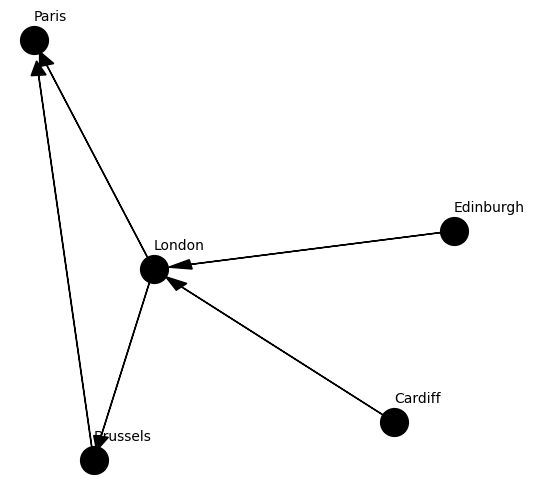

In [52]:
G.plot()

Here we can start to visualise the pathways in a graph. In artificial intelligence, we are often implementing agents to traverse graphs to find, for example, shortest paths.

We can think about how we might implement an AI to find the shortest path from Edinburgh to Paris. There is no edge between the two cities, but we can create two paths that take us there:

$(\text{Edinburgh},\text{London},\text{Brussels},\text{Paris})$

and

$(\text{Edinburgh},\text{London},\text{Paris})$

It is obvious to us which path is shortest, but graphs allow us to codify this information. In these problems, the graphs can be much more complex, with many possible paths, and may have additional weights on the edges that can provide a "cost" to traversing an edge.

### Trees

Trees are a specific type of graph that exhibits certain properties.

A directed graph $G = (V,E)$ is said to be a _tree_ if the set of vertices, $V$, can be represented as the union of subsets:

$\underbrace{\{r\}}_{V_0}\cup V_1\cup V_2\cup\ldots\cup V_n$,

where $r \notin V_i$ for $i=1\ldots n$ and $V_i \cap V_j = \emptyset$ for $i\neq j$, and that for every subset $V_i$ there exists exactly one edge $(w,v), \forall v \in V_i$, where $w\in V_{i-1}$.

In plain terms, this means that the graph can be described as a set of _layers_, with each layer being a set of nodes disconencted from each others, and an edge that connects a single node from the layer above. The top-most layer is a single node, termed the "root".

In [53]:
class Node(Vertex):
    """
    Special case of Vertex for use in Tree

    Attributes
    ----------
    children : set
        Denotes children of the node
    """
    @property
    def children(self):
        return {edge.end for edge in self.edges}

class Tree(Graph):
    """
    Special case of Graph that has properties of Tree

    Attributes
    ----------
    root : Node
        Denotes the root node of the tree
    is_tree : bool
        Must be True
    subtrees : set
        Returns the set of subtrees created from immediate children of root
    """
    def __init__(self, root:Node):
        assert isinstance(root, Node), "root is not a valid Node"
        super().__init__(directed=True)
        self.root = root
        assert self.is_tree, "not a valid tree"
    @property
    def nodes(self):
        return {self.root}.union(self._expand(self.root))
    @property
    def is_tree(self):
        """ Performs check for tree validity """
        nodes = {0: {self.root}}
        level = 1
        nodes[level] = self.root.children
        while len(nodes[level]) > 0:
            nodes[level+1] = set.union(*[node.children for node in nodes[level]])
            level += 1
            for i in range(level):
                if len(set.intersection(nodes[i],nodes[level])) > 0:
                    return False
        return True
    @property
    def subtrees(self):
        return {Tree(child) for child in self.root.children}
    def _expand(self,node):
        return {node}.union(
            *[{child}.union(
                *[self._expand(grandchild) 
                  for grandchild in child.children])
              for child in node.children])

Trees have special properties, where each node (except the root) has a single parent, but may have multiple choices. The tree data structure is important to represent branching paths or decisions.

We can create a graph using the above implementation, a special case of the graph.

We define a node, "root" and give it two children "v10" and "v11". These represent the first layer $V_1$. Each of these nodes is assigned children, which form the second layer $V_2$. Every node in $V_2$ is connected to from a node in $V_1$. We can see this implemented below:

In [54]:
root = Node("root")
left = Node("v10")
root.connect(left)

right = Node("v11")
root.connect(right)

left.connect(Node("v20"))
left.connect(Node("v21"))

right.connect(Node("v23"))

T = Tree(root)
T

V:{v20, v11, v21, v23, root, v10}
E:{v10-->v20, root-->v11, root-->v10, v10-->v21, v11-->v23}

Using the `plot` utility, we can visualise this and look at the tree structure

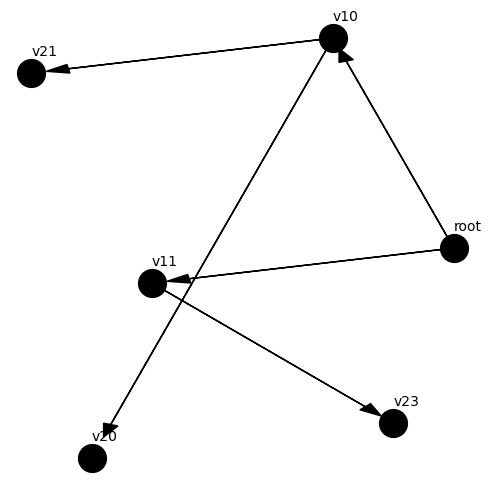

In [55]:
T.plot()

> Be aware that trees are typically formatted nicer than this, but that this shows that any graph may be a tree if it's structured correctly.

What happens if we create an edge between $v10$ and $v11$? Since these are in the same layer, is this still a tree?

In [56]:
left.connect(right)

T.is_tree

False

We perform the check by traversing the edges to create the subsets and ensuring that no node appears in multiple subsets.

```python
def is_tree(self):
    """ Performs check for tree validity """
    nodes = {0: {self.root}}
    level = 1
    nodes[level] = self.root.children
    while len(nodes[level]) > 0:
        nodes[level+1] = set.union(*[node.children for node in nodes[level]])
        level += 1
        for i in range(level):
            if len(set.intersection(nodes[i],nodes[level])) > 0:
                return False
    return True
```